In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [33]:
data = pd.read_csv(r"E:\AI Engineering Course\2 - Applied data science with python\Projects\Marketing-campaigns\marketing_data.csv")
df = pd.DataFrame(data)

print(df.head())

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

In [34]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [37]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month    
df['Day'] = df['Dt_Customer'].dt.day

### Data Cleaning and Handling
#### Handling Income column

In [38]:
df.rename(columns={' Income ': 'Income'}, inplace=True)

df["Income"] = df["Income"].str.replace('$', '').str.replace(',', '').str.strip()
df["Income"] = pd.to_numeric(df["Income"], errors='coerce')

df["Income"]

C:\Users\NITIN\AppData\Local\Temp/ipykernel_3420/3411789439.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Income"] = df["Income"].str.replace('$', '').str.replace(',', '').str.strip()


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [39]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

#### Check for nulls and treat them

In [40]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Year                    0
Month                   0
Day                     0
dtype: int64

#### Null values in Income column

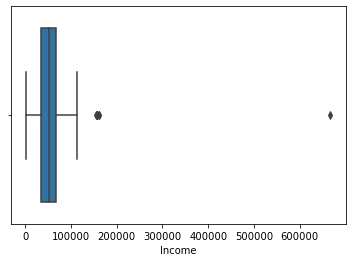

In [41]:
sns.boxplot(x=df["Income"])
plt.show()

In [42]:
mean_no_nulls = df['Income'][df['Income'] > 0].mean()
df['Income'].fillna(mean_no_nulls, inplace=True)

df["Income"].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

#### Creating new columns

In [ ]:
df["Age"] = 2024 - df["Year_Birth"]
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Total_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["Total_Purchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df["campaign"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]

### Exploratory Data Analysis
#### Univariate Analysis

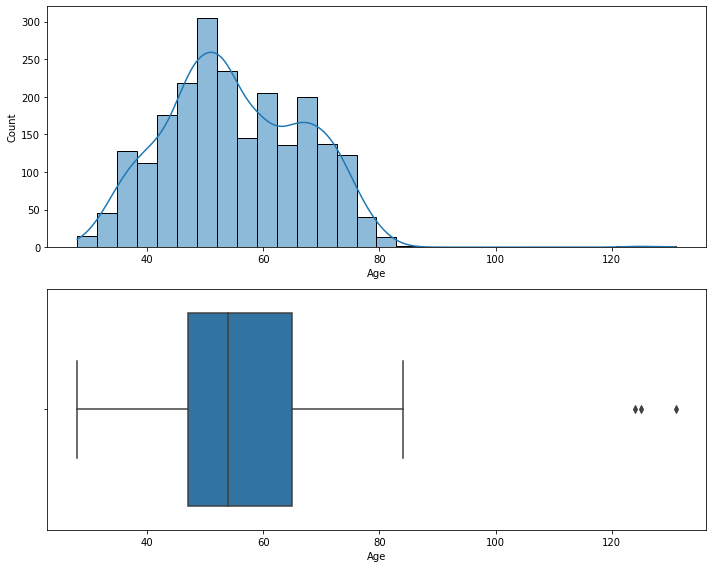

In [44]:
#Data visualization for "Age"
fig ,axes = plt.subplots(2, 1, figsize=(10,8))
sns.histplot(df["Age"], bins=30, kde=True, ax=axes[0])
sns.boxplot(x=df["Age"], ax=axes[1])
plt.tight_layout()
plt.show()

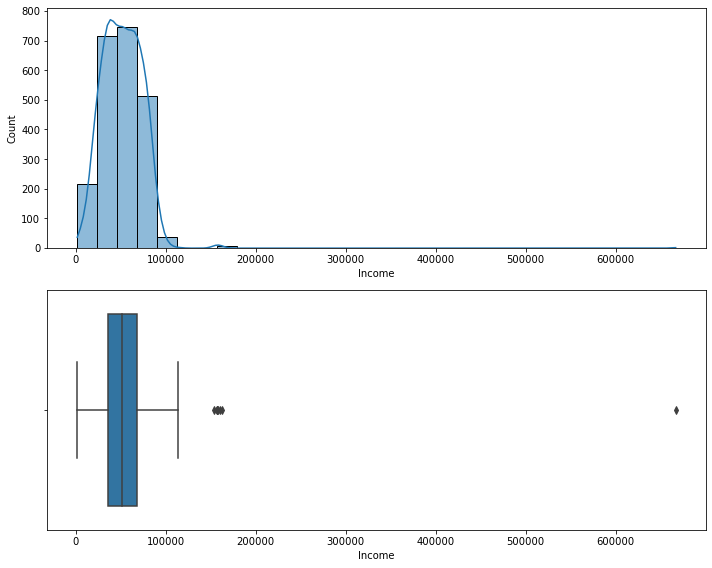

In [45]:
#Data visualization for "Income"
fig ,axes = plt.subplots(2, 1, figsize=(10,8))
sns.histplot(df["Income"], bins=30, kde=True, ax=axes[0])
sns.boxplot(x=df["Income"], ax=axes[1])
plt.tight_layout()
plt.show()

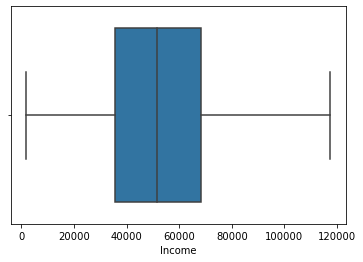

In [46]:
#Outlier treatment for "Income"
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df["Income"] = df["Income"].clip(lower_bound, upper_bound)
sns.boxplot(x=df["Income"])
plt.show()

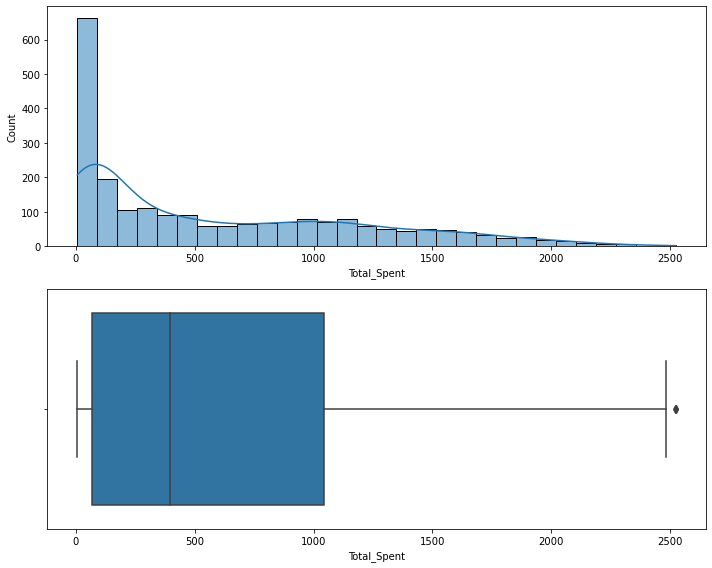

In [47]:
#Data visualization for "Total_Spent"
fig ,axes = plt.subplots(2, 1, figsize=(10,8))
sns.histplot(df["Total_Spent"], bins=30, kde=True, ax=axes[0])
sns.boxplot(x=df["Total_Spent"], ax=axes[1])    
plt.tight_layout()
plt.show()

### Encoding and One-hot enocding

In [48]:
print(df["Education"].unique())
education_mapping = {"Basic" : 0, "2n Cycle" : 1, "Graduation" : 2, "Master" : 3, "PhD" : 4}
df["Education"] = df["Education"].map(education_mapping)

df= pd.get_dummies(df, columns=["Marital_Status", "Country"], drop_first=True)

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


#### Correlation Heatmap

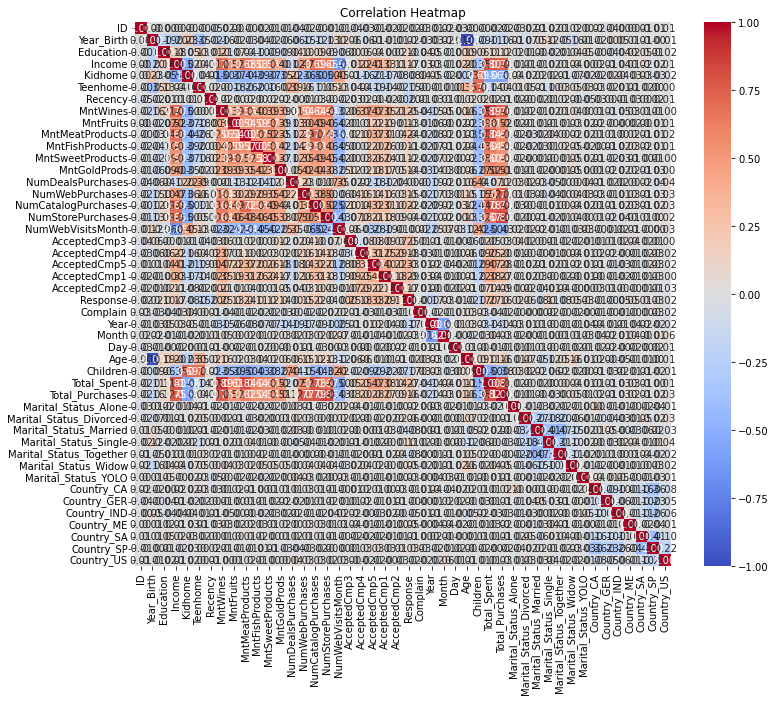

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Hypothesis Testing
#### Hypothesis 1: Older Customers prefer in-store purchases

In [34]:
median_age = df['Age'].median()
df['Age_Group'] = np.where(df['Age'] < median_age, 'Young', 'Old')
df['Age_Group'] = df['Age_Group'].astype('category')

older_store = df[df['Age_Group'] == 'Old']['NumStorePurchases']
younger_store = df[df['Age_Group'] == 'Young']['NumStorePurchases']

t_stat, p_value = stats.ttest_ind(older_store, younger_store)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Older customers make more instore purchases compared to online.")
else:
    print("Fail to reject the null hypothesis: No significant difference in NumStorePurchases between age groups.")

Reject the null hypothesis: Older customers make more instore purchases compared to online.


#### Hypothesis 2: Customers with children prefer online shopping

In [36]:
anova_result = stats.f_oneway(df[df['Children'] == 0]['NumWebPurchases'],
                              df[df['Children'] == 1]['NumWebPurchases'],
                              df[df['Children'] > 1]['NumWebPurchases'])

alpha = 0.05

if(anova_result.pvalue < alpha):
    print("Reject the null hypothesis: Customers with children make more online purchases.")
else:
    print("Fail to reject the null hypothesis: No significant difference in NumWebPurchases based on number of children.")

Reject the null hypothesis: Customers with children make more online purchases.


#### Hypothesis 3: Store sales cannibalized by online/catalog

In [12]:
corr_online, p1_value = stats.pearsonr(df['NumStorePurchases'], df['NumWebPurchases'])
corr_catalog, p2_value = stats.pearsonr(df['NumStorePurchases'], df['NumCatalogPurchases'])

alpha = 0.05
if p1_value < alpha:
    print("Reject null hypothesis: Store purchases negatively correlated with online purchases.")
else:
    print("Fail to reject null hypothesis: No significant correlation between store and online purchases.")

Reject null hypothesis: Store purchases negatively correlated with online purchases.


#### Hypothesis 4: US vs Rest of the world purchase volumes

In [14]:
us_purchases = df[df["Country"] == "US"]['Total_Purchases']
rest_purchases = df[df["Country"] != "US"]['Total_Purchases']

t_stat, p_value = stats.ttest_ind(us_purchases, rest_purchases)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: US customers make more purchases than the rest of the world.")
else:
    print("Fail to reject null hypothesis: No significant difference in purchase volumes between US and rest of the world.")

Fail to reject null hypothesis: No significant difference in purchase volumes between US and rest of the world.


### Insights via visualization

Text(0.5, 1.0, 'Total Sales by Product Category')

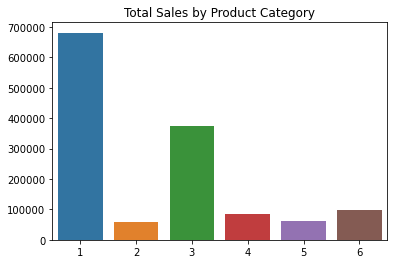

In [21]:
#Top/Low performing products
map_products = {"MntWines" : 1, "MntFruits" : 2, "MntMeatProducts" : 3, "MntFishProducts" : 4, "MntSweetProducts" : 5, "MntGoldProds" : 6}
top_products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
top_products = top_products.rename(index = map_products)
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Total Sales by Product Category")

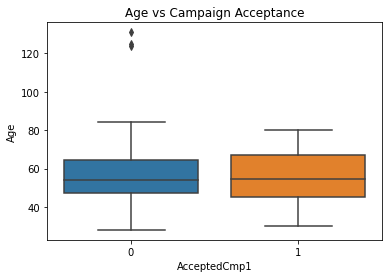

In [24]:
#Age vs Campaign Acceptance
sns.boxplot(x='AcceptedCmp1', y='Age', data=df)
plt.title("Age vs Campaign Acceptance") 
plt.show()

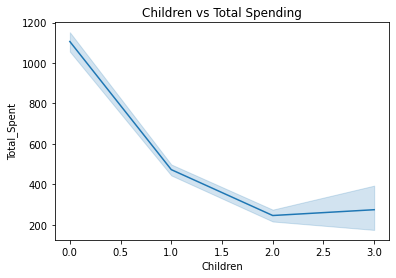

In [66]:
#Children vs Spending
sns.lineplot(x='Children', y='Total_Spent', data=df)
plt.title("Children vs Total Spending")
plt.show()
